In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Loading the dataset

In [ ]:
df_original = pd.read_csv('/content/drive/MyDrive/Diabetes/diabetes2-modified.csv')
df_original.head()

,BMI,DiabetesPedigreeFunction,Outcome
0,33.6,0.627,1
1,26.6,0.351,0
2,23.3,0.672,1
3,28.1,0.167,0
4,43.1,2.288,1


In [ ]:
cols = df_original.columns.tolist()

In [ ]:
from sklearn.feature_selection import mutual_info_classif
feature_df =df_original [['BMI','DiabetesPedigreeFunction']]
class_labels =df_original['Outcome']

In [ ]:
feature_df=np.array(feature_df)
class_labels =np.array(class_labels)

Plotting

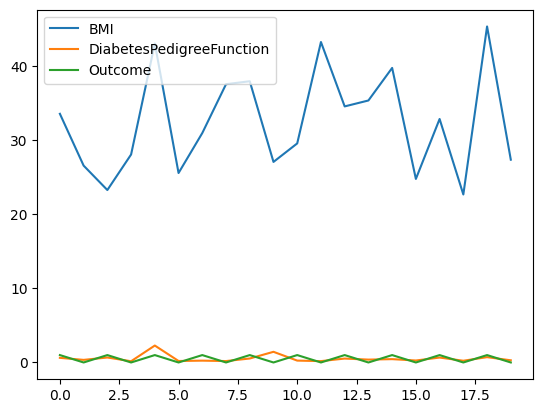

In [ ]:
plt.plot(df_original,label ='Inline label')
plt.legend(['BMI','DiabetesPedigreeFunction','Outcome'])

In [ ]:
z= np.zeros((20,2))
for i in range(20):
  z[i,class_labels[i] ] = 1

In [ ]:
feature_df.shape

(20, 2)

Adding Weights and Bias

In [ ]:
w1 =np.random.randn(3,2)
b1=np.random.randn(3)
w2=np.random.randn(3,2)
b2 = np.random.randn(2)

In [ ]:
w1

array([[ 1.47956049,  0.29299819],
       [ 0.09854974, -0.37797239],
       [ 0.65013713, -0.38863682]])

In [ ]:
b1

array([ 0.25399004,  1.1160528 , -0.3790083 ])

In [ ]:
w2

array([[-0.42076819,  0.69630834],
       [ 1.1707407 ,  0.76999625],
       [-0.90869241,  0.35543742]])

In [ ]:
b2

array([ 0.60542381, -1.82339719])

In [ ]:
feature_df.dot(w1.T)

array([[49.89694218,  3.07428246, 21.60093222],
       [39.45915128,  2.48875468, 17.15723609],
       [34.6706541 ,  2.04221142, 14.88703114],
       [41.62458034,  2.70612621, 18.20395095],
       [64.43943679,  3.38269282, 27.13170918],
       [37.93564106,  2.44690081, 16.56539448],
       [45.9390386 ,  2.96130468, 20.05786904],
       [55.68743691,  3.63327737, 24.37092639],
       [56.38063847,  3.54191882, 24.4965129 ],
       [40.51829955,  2.12603965, 17.05869052],
       [43.86941191,  2.82106722, 19.14534524],
       [64.11858769,  4.19803465, 28.07981711],
       [51.34778884,  3.20987349, 22.28915576],
       [52.49012448,  3.34200739, 22.86406325],
       [59.0186495 ,  3.75181397, 25.7001825 ],
       [36.77133056,  2.34311484, 16.01963475],
       [48.87238377,  2.9909347 , 21.13106803],
       [33.65487759,  2.14825551, 14.66678316],
       [67.38329773,  4.20163995, 29.23601847],
       [40.62609877,  2.5891389 , 17.69949809]])

Feed Forward Network

In [ ]:
def farward_prop(feature_df,w1,ba,w2,b2):
  #first layer
  M =1/(1+np.exp(-(feature_df.dot(w1.T)+b1)))
  #2nd layer
  A = M.dot(w2) +b2
  expA = np.exp(A)
  Y = expA /expA.sum(axis = 1, keepdims = True)
  return Y,M

In [ ]:
farward_prop(feature_df,w1,b1,w2,b2)

(array([[0.60882643, 0.39117357],
        [0.60772285, 0.39227715],
        [0.60635655, 0.39364345],
        [0.60820626, 0.39179374],
        [0.60919999, 0.39080001],
        [0.60761774, 0.39238226],
        [0.60865899, 0.39134101],
        [0.60943061, 0.39056939],
        [0.60935302, 0.39064698],
        [0.60665814, 0.39334186],
        [0.608424  , 0.391576  ],
        [0.6097821 , 0.3902179 ],
        [0.60900456, 0.39099544],
        [0.60915691, 0.39084309],
        [0.60952142, 0.39047858],
        [0.6073384 , 0.3926616 ],
        [0.60870469, 0.39129531],
        [0.60673442, 0.39326558],
        [0.60978377, 0.39021623],
        [0.60795857, 0.39204143]]),
 array([[1.        , 0.98508463, 1.        ],
        [1.        , 0.97352719, 0.99999995],
        [1.        , 0.95923312, 0.9999995 ],
        [1.        , 0.97858842, 0.99999998],
        [1.        , 0.98899942, 1.        ],
        [1.        , 0.97242688, 0.99999991],
        [1.        , 0.98333038, 1.       

BACK PROPAGATION

In [ ]:
#return gardient decent for weight2
def diff_w2(H,z,Y):
  return H.T.dot(z-Y)

In [ ]:
#return gradient for weights
def diff_w1(feature_df,H,z,output,w2):
  dZ=(z-output).dot(w2.T)*H*(1-H)
  return feature_df.T.dot(dZ) 

In [ ]:
# return to deactivate the bias
def diff_b2(z,Y):
  return (z-Y).sum(axis = 0)
def diff_b1(z,Y,w2,H):
  return ((z-Y).dot(w2.T) * H *(1-H)).sum(axis =0)



In [ ]:
learning_rate = 1e-3
for epoch in range(5000):
  output,hidden = farward_prop(feature_df,w1,b1,w2,b2)
  w2 += learning_rate * diff_w2(hidden,z,output)
  b2 += learning_rate * diff_b2(z,output)
  w1 +=learning_rate * diff_w1(feature_df,hidden,z,output,w2).T
  b1 +=learning_rate * diff_b1(z,output,w2,hidden)

Prediction

In [ ]:
X_test =np.array([45.8,0.551])

hidden_output =1 /(1+np.exp(X_test.dot(w1.T)- b1))
Outer_layer_output =hidden_output.dot(w2)+ b2
expA = np.exp(Outer_layer_output)
Y = expA /expA.sum()
print("Accrracy testing >>>>> {} ".format(Y[0]))


Accrracy testing >>>>> 0.8126470134606478 
